## 新闻分类：多分类问题 multiclas classification

In [1]:
# 使用路透社数据集,它包含46个不同的主题
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 35s 17us/step


In [3]:
print('训练数据的行数：',len(train_data))
print('测试数据的行数：',len(test_data))
print('*********************************************************************')
print('训练数据第一行：',train_data[0])
print('训练标签第一行：',train_labels[0])

训练数据的行数： 8982
测试数据的行数： 2246
*********************************************************************
训练数据第一行： [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
训练标签第一行： 3


### 1、准备数据
one-hot编码也叫为分类编码 categorical encoding

In [4]:
# 将整数序列编码为二进制矩阵 one—hot编码
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train=vectorize_sequences(train_data) #将训练数据向量化
x_test=vectorize_sequences(test_data)  # 将测试数据向量化

In [6]:
# 对标签进行one-hot 编码，将每个标签表示为全零向量，只有标签索引对应的元素为1

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels) # 将训练标签向量化
one_hot_test_labels = to_one_hot(test_labels)  # 将测试标签向量化

### 2、构建网络

Dense层的堆叠，每层只能访问上一层输出的信息。如果某一层丢失了与分类问题相关的一些信息，那么这些信息无法被后面的层找回。也就是说，每一层都可能成为信息瓶颈。

In [9]:
# 模型定义
from keras import models
from keras import layers
model=models.Sequential() #序列模型（Sequential model）:一个线性的层次堆栈。通过传递一系列 layer 实例给构造器来创建一个序列模型
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
#编译模型
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

 网络的最后一层是大小为 46 的 Dense 层。这意味着，对于每个输入样本，网络都会输
出一个46 维向量。这个向量的每个元素（即每个维度）代表不同的输出类别。

 最后一层使用了 softmax 激活。网络将输出在 46
个不同输出类别上的概率分布——对于每一个输入样本，网络都会输出一个46 维向量，
其中output[i] 是样本属于第i 个类别的概率。46 个概率的总和为1。

 对于这个例子，最好的损失函数是categorical_crossentropy（分类交叉熵）。它用于衡量两个概率分布之间的距离，这里两个概率分布分别是网络输出的概率分布和标签的真实分
布。通过将这两个分布的距离最小化，训练网络可使输出结果尽可能接近真实标签。

### 3、验证你的方法

In [16]:
# 留出验证集
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

# 训练模型
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 274us/step - loss: 2.4983 - acc: 0.4920 - val_loss: 1.6846 - val_acc: 0.6450
Epoch 2/20
7982/7982 [==============================] - 1s 171us/step - loss: 1.3951 - acc: 0.7040 - val_loss: 1.2838 - val_acc: 0.7140
Epoch 3/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.0514 - acc: 0.7694 - val_loss: 1.1196 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.8262 - acc: 0.8276 - val_loss: 1.0250 - val_acc: 0.7750
Epoch 5/20
7982/7982 [==============================] - ETA: 0s - loss: 0.6611 - acc: 0.8651- ETA: 0s - loss: 0.6681 - acc - 1s 174us/step - loss: 0.6613 - acc: 0.8638 - val_loss: 0.9728 - val_acc: 0.7960
Epoch 6/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.5264 - acc: 0.8925 - val_loss: 0.9218 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 174us/st

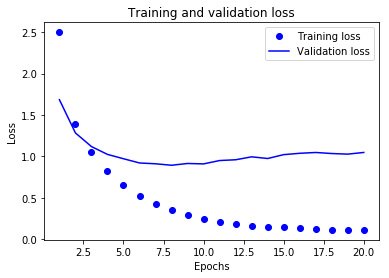

In [18]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

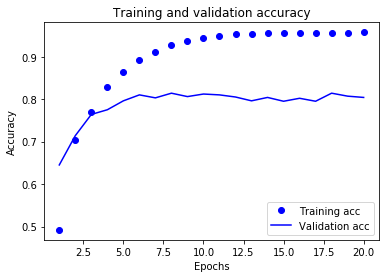

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

##### 网络在训练9 轮后开始过拟合。我们从头开始训练一个新网络，共9 个轮次，然后在测试集上评估模型

### 从头开始重新训练一个模型

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 228us/step - loss: 2.5415 - acc: 0.5231 - val_loss: 1.6819 - val_acc: 0.6510
Epoch 2/9
7982/7982 [==============================] - 1s 168us/step - loss: 1.3804 - acc: 0.7091 - val_loss: 1.2831 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 169us/step - loss: 1.0223 - acc: 0.7767 - val_loss: 1.1322 - val_acc: 0.7490
Epoch 4/9
7982/7982 [==============================] - 1s 185us/step - loss: 0.8041 - acc: 0.8239 - val_loss: 1.0535 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 1s 188us/step - loss: 0.6437 - acc: 0.8623 - val_loss: 0.9754 - val_acc: 0.79700s - loss: 0.6503 - acc
Epoch 6/9
7982/7982 [==============================] - 1s 177us/step - loss: 0.5152 - acc: 0.8923 - val_loss: 0.9119 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 183us/step - loss: 0.4145 - acc: 0.9142 - val_loss: 0.8955 - 

[1.0244741541725764, 0.7756010686194165]

### 在新数据上生成预测结果

In [21]:
predictions = model.predict(x_test)

In [22]:
# predictions中每个元素都是长度为46的向量
predictions[0].shape

(46,)

In [23]:
# 向量的所有元素总和为1
np.sum(predictions[0])

0.9999996

In [24]:
# 最大的元素就是预测类别，及概率最大的类别
np.argmax(predictions[0])

3